## Identifying the diffrent images of cigaratte packests belongings to different brand

In [1]:
#pip install opencv-python

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
os.chdir("C:\\Users\\Home\\Desktop\\Dataset\\clustring Images")
%matplotlib inline

- Here Data is in the form of images , so we have to do some Data munging to get the desired format (Shape the data to be used in k means algorithm)

-  By going all the sub floders it will caputre the data

In [3]:
# To capture all image 
def get_image(path):   
    im=cv2.imread(path)                        #imread : function to read the image
    im=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)     #All iamges are colured images :converted into gray image using :cvtcolor
    im=cv2.resize(im,(90,135),cv2.INTER_LINEAR)#resize the image
    i=im[0:100,:]                              #picking first 100 pixels to get read the wordings in images
    return i

In [4]:
labels=[]                  #folder number
images=[]                  #to store all converted images

In [5]:
for i in ['1','2','3','4']:                                 #other then image if any file in folder ,it may ger error
    for p in enumerate(os.listdir(os.getcwd()+"\\"+i)):     #Fetching each image
        images.append(get_image(os.getcwd()+'\\'+i+'\\'+p[1])) #Reading each image
        labels.append(i)                                       #Appending each images list

### Converstion of all the images into numpy array

In [6]:
x_train=np.array(images)      
x_train.shape                #380 images ,100 pixellong ,90 pixel wide

(380, 100, 90)

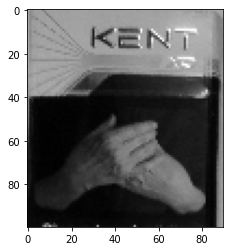

In [7]:
plt.imshow(x_train[100,:],cmap="gray")   #100th picture in images 

In [8]:
#Flatten the images : so that each row of n-dimesional array there is just a single image 
pixels = x_train.flatten().reshape(380, 9000) # 31500 = 350*300*3 
print(pixels.shape)

(380, 9000)


In [9]:
## Model Building
import pandas as pd
from sklearn.cluster import KMeans

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
Scaler = MinMaxScaler()
train = Scaler.fit_transform(pixels)

In [20]:
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
np.random.seed(100)
kmeans.fit(train)

KMeans(n_clusters=4)

In [13]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3,
       3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       3, 0, 3, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,

In [21]:
image_clusters=pd.DataFrame({'Cluster':kmeans.labels_,"Id":range(0,380)})

In [22]:
image_clusters.head()

Cluster  Id
0        2   0
1        2   1
2        2   2
3        2   3
4        2   4

In [16]:
clust_1=image_clusters[image_clusters.Cluster==0]

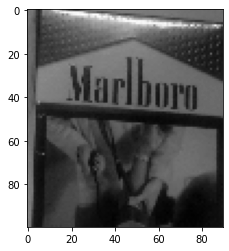

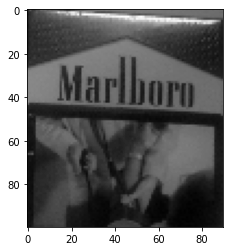

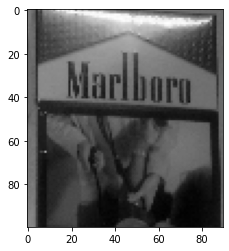

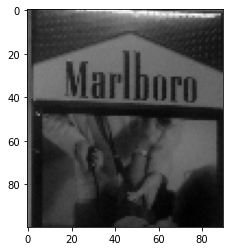

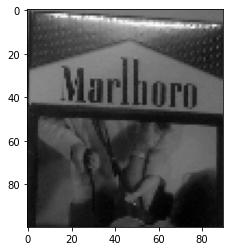

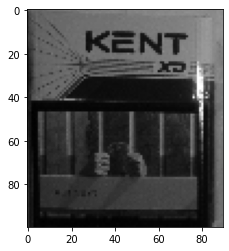

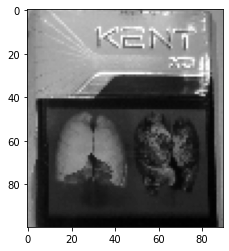

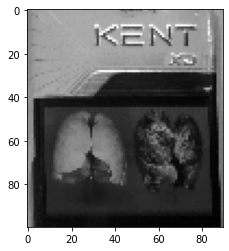

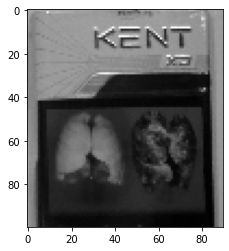

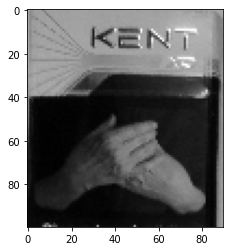

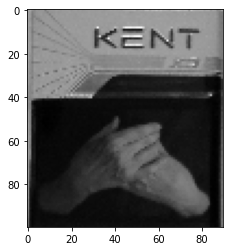

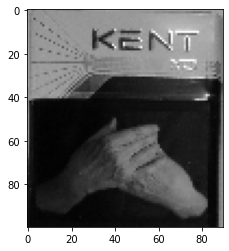

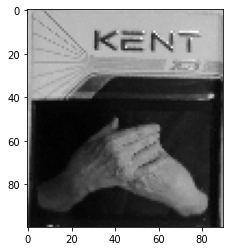

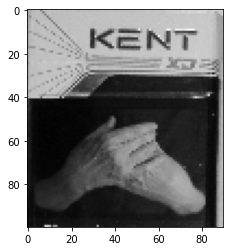

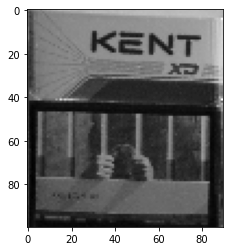

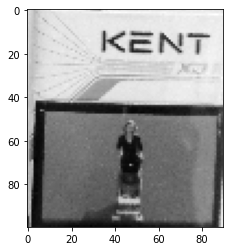

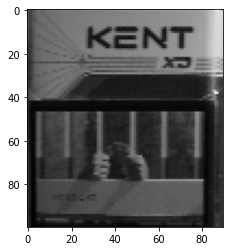

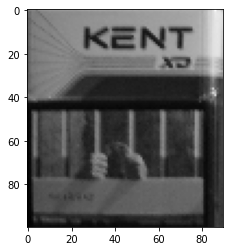

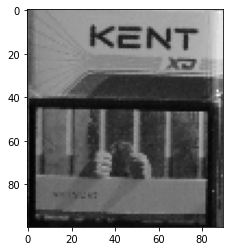

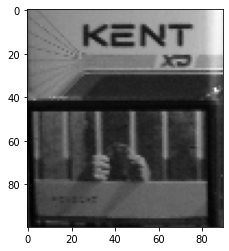

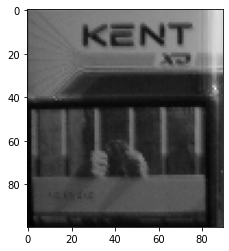

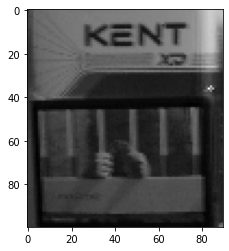

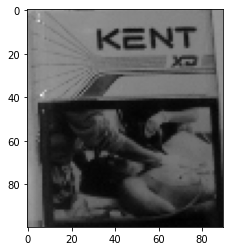

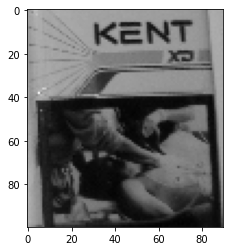

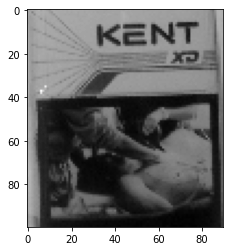

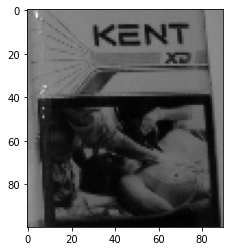

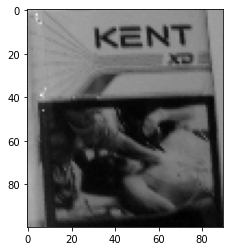

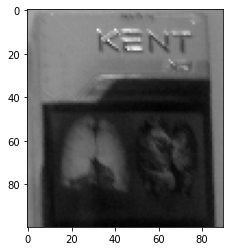

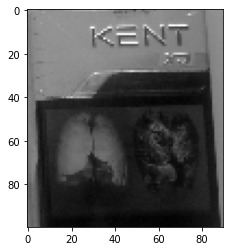

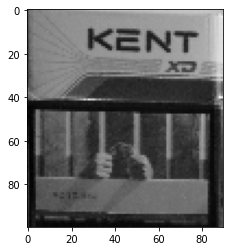

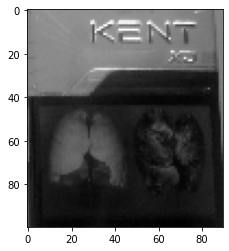

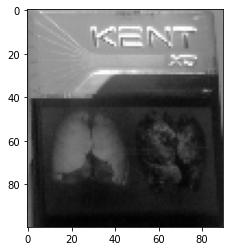

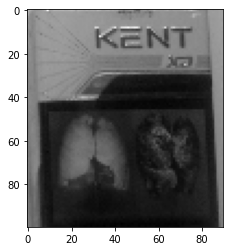

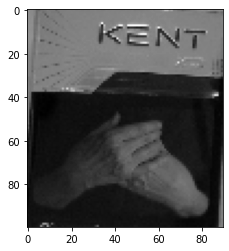

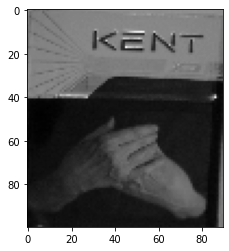

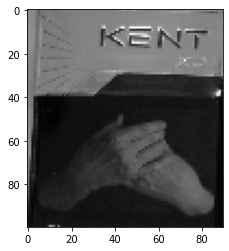

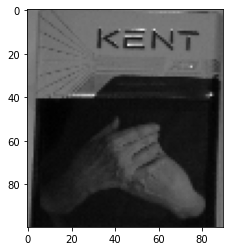

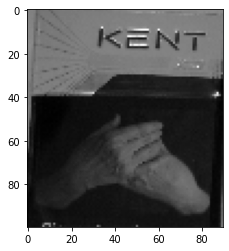

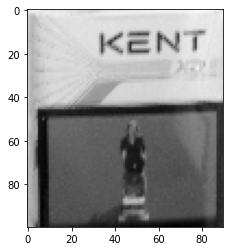

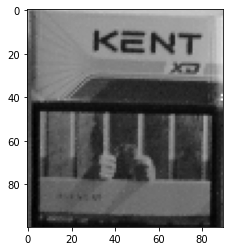

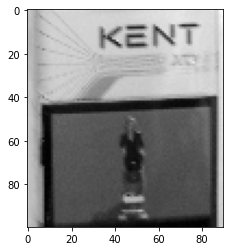

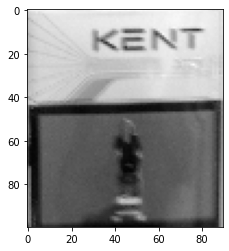

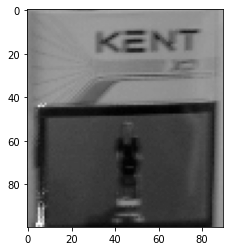

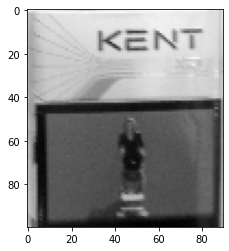

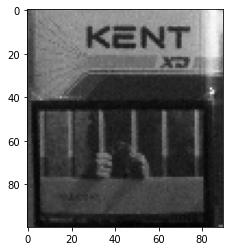

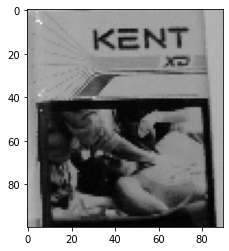

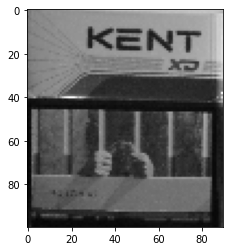

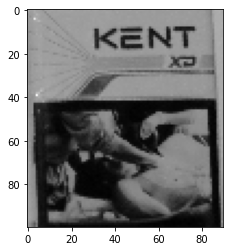

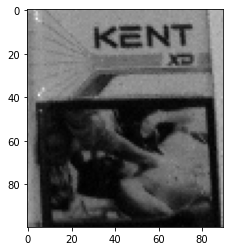

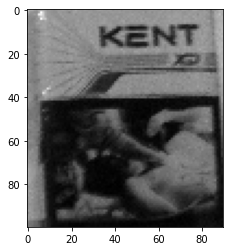

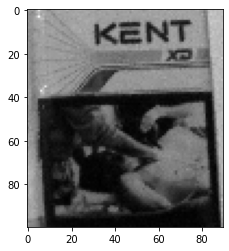

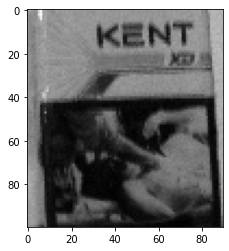

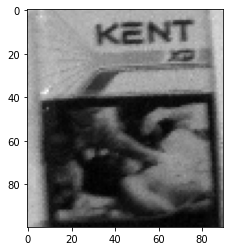

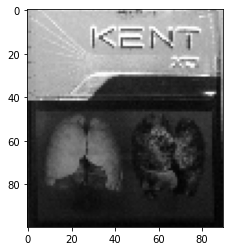

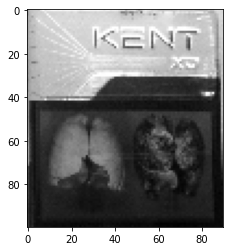

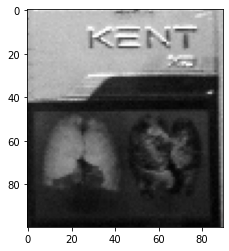

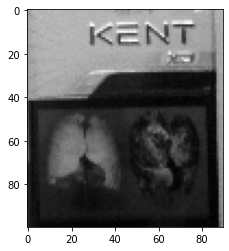

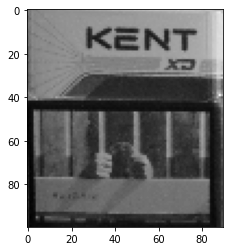

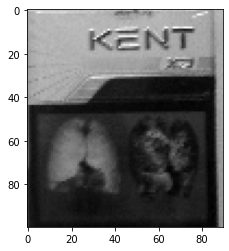

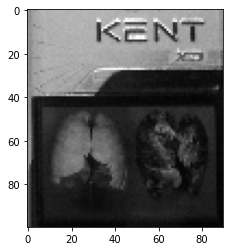

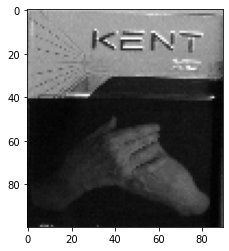

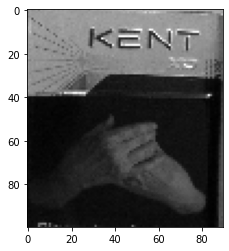

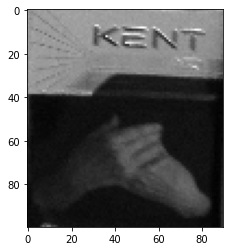

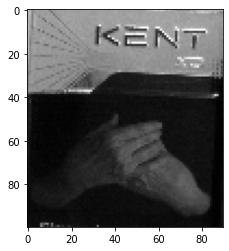

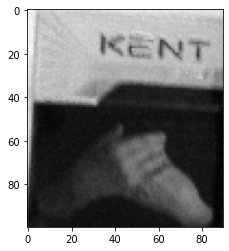

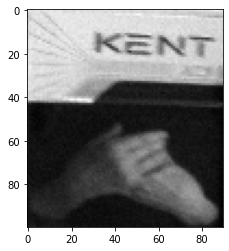

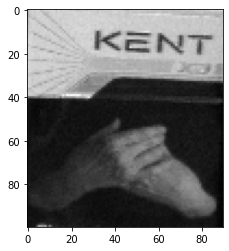

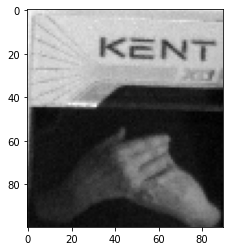

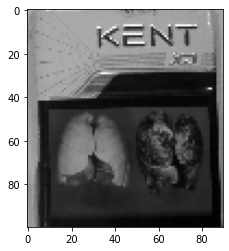

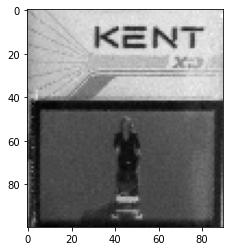

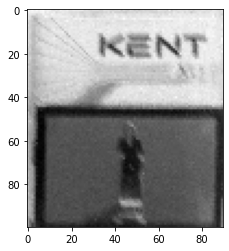

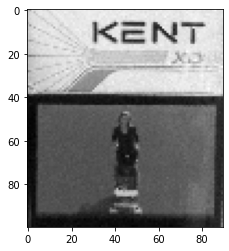

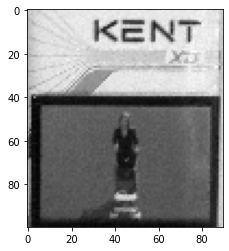

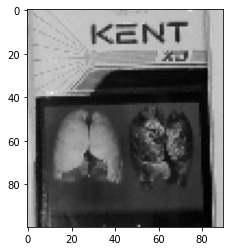

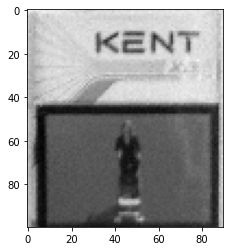

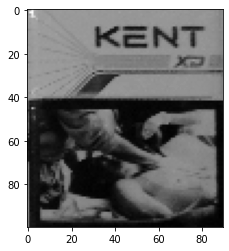

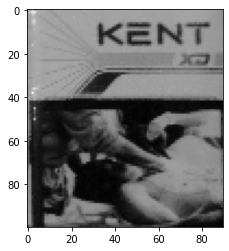

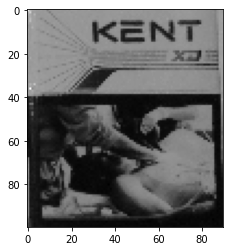

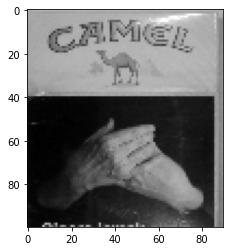

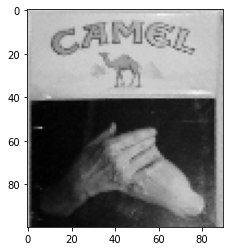

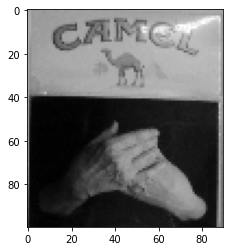

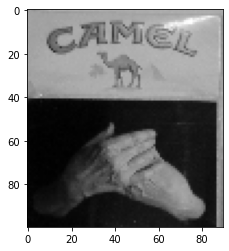

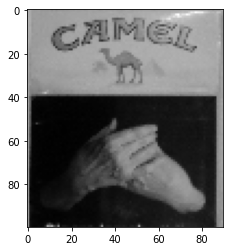

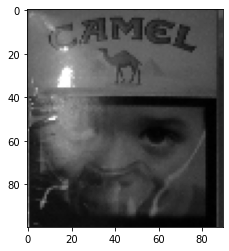

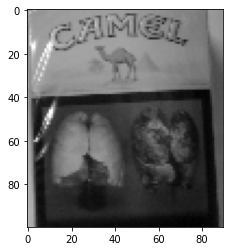

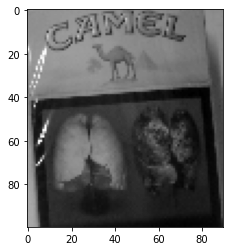

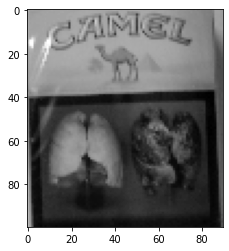

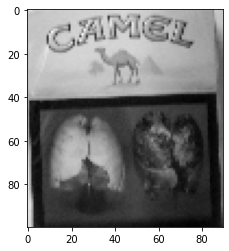

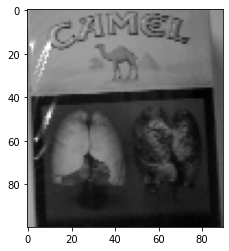

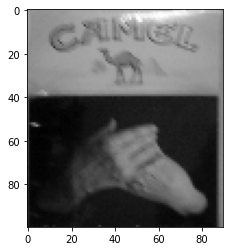

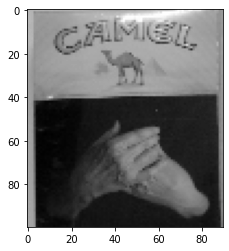

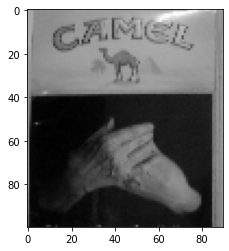

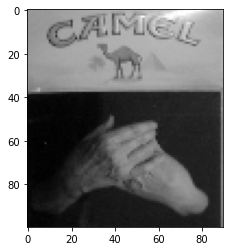

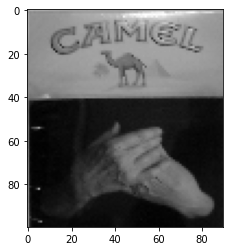

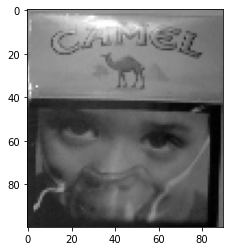

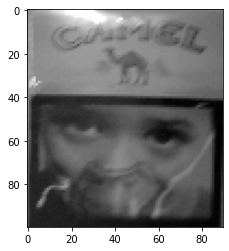

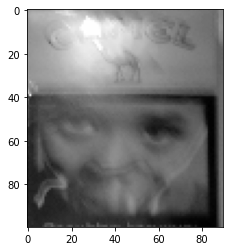

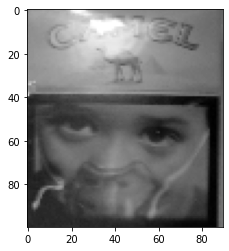

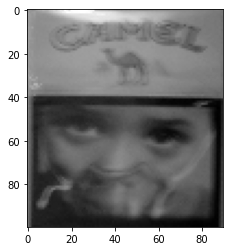

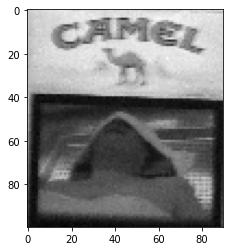

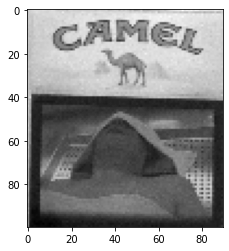

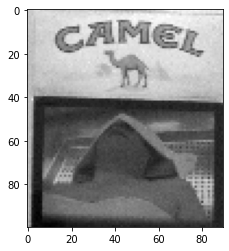

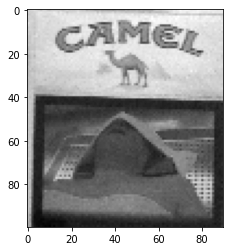

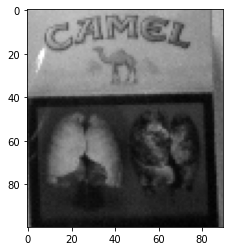

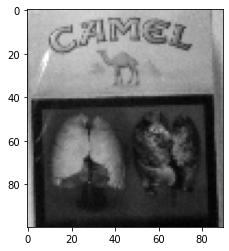

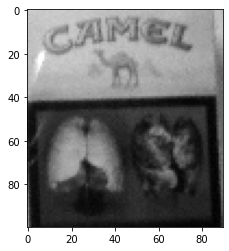

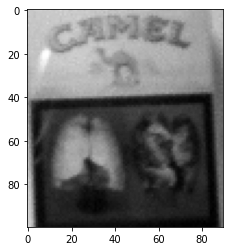

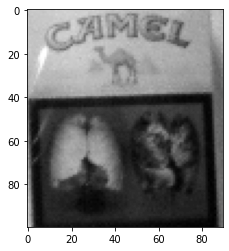

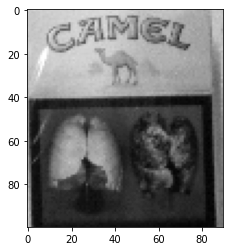

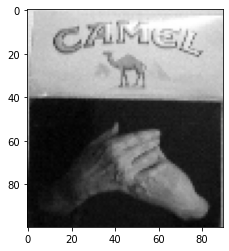

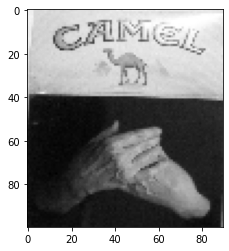

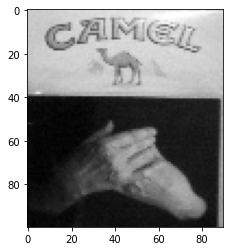

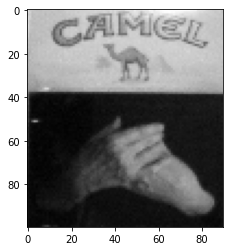

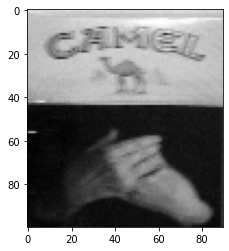

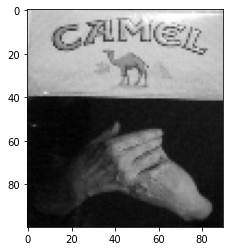

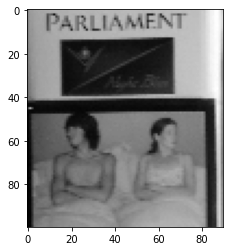

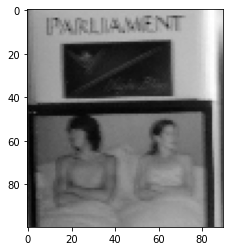

In [23]:
for i in clust_1.Id:
    plt.imshow(x_train[i,:],cmap="gray")
    plt.show()

In [18]:
clust_1

Cluster   Id
53         0   53
54         0   54
55         0   55
56         0   56
57         0   57
..       ...  ...
261        0  261
262        0  262
263        0  263
341        0  341
367        0  367

[117 rows x 2 columns]